In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
data_train  = pd.read_csv("Titanic_train.csv")
data_test = pd.read_csv("Titanic_test.csv")

In [ ]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#assign codes to the dataframe
data_train["code"]= 1
data_test["code"]= 0

In [ ]:
#merging the dataframes into one
df = pd.concat([data_train, data_test])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.680672
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  code         1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'code'],
      dtype='object')

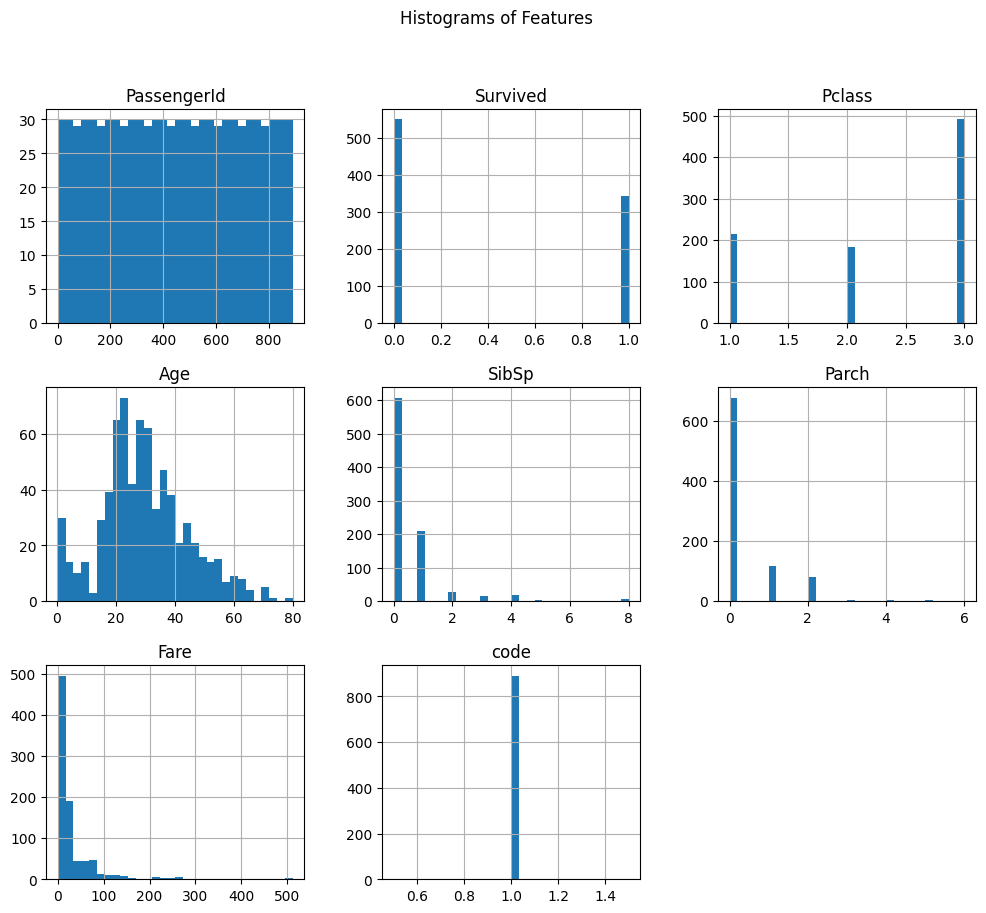

In [ ]:
data_train.hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of Features')
plt.show()

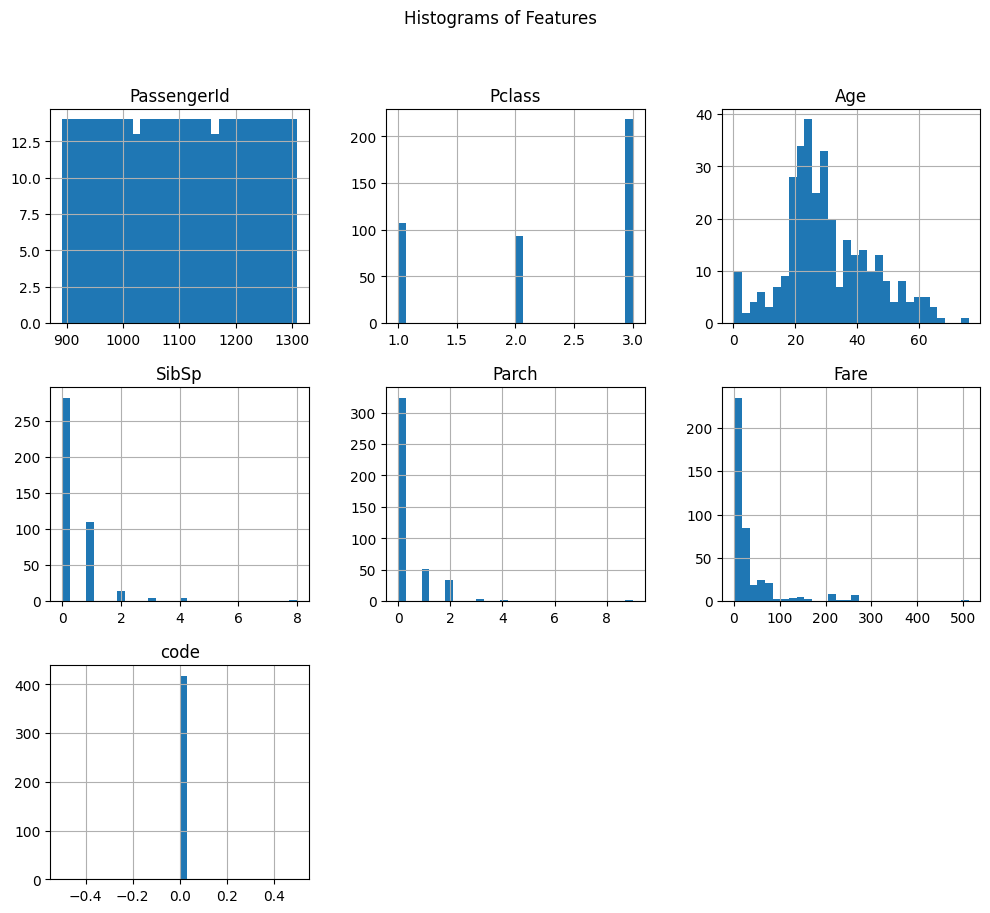

In [ ]:
data_test.hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of Features')
plt.show()

In [ ]:
df['Age'].isna().sum()/len(df['Age'])*100

20.091673032849503

In [ ]:
df["Age"].fillna(df["Age"].median(),inplace=True)
df["Fare"].fillna(df["Fare"].median(),inplace=True)
df['Cabin'].isna().sum()/len(df['Cabin'])*100
df.drop("Cabin",axis=1,inplace=True)

In [ ]:
df1= df.copy()
new_df1 = df1[(df["Embarked"]=="S")|(df["Embarked"]=="C")|(df["Embarked"]=="Q")]
new_df1.shape

(1307, 12)

In [ ]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1307 non-null   int64  
 1   Survived     889 non-null    float64
 2   Pclass       1307 non-null   int64  
 3   Name         1307 non-null   object 
 4   Sex          1307 non-null   object 
 5   Age          1307 non-null   float64
 6   SibSp        1307 non-null   int64  
 7   Parch        1307 non-null   int64  
 8   Ticket       1307 non-null   object 
 9   Fare         1307 non-null   float64
 10  Embarked     1307 non-null   object 
 11  code         1307 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 132.7+ KB


In [ ]:
new_df1.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
new_df1["Embarked"].value_counts()

,count
Embarked,
S,914
C,270
Q,123


In [ ]:
new_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


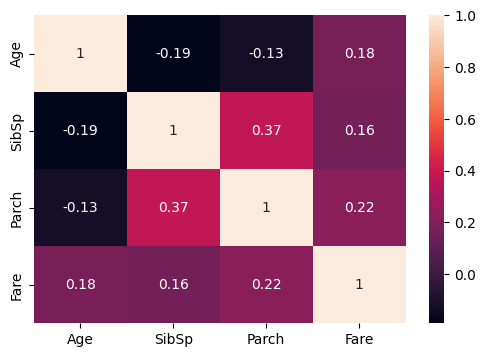

In [ ]:
numerical_variables = new_df1[["Age", "SibSp", "Parch", "Fare"]]
correlation_matrix = numerical_variables.corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

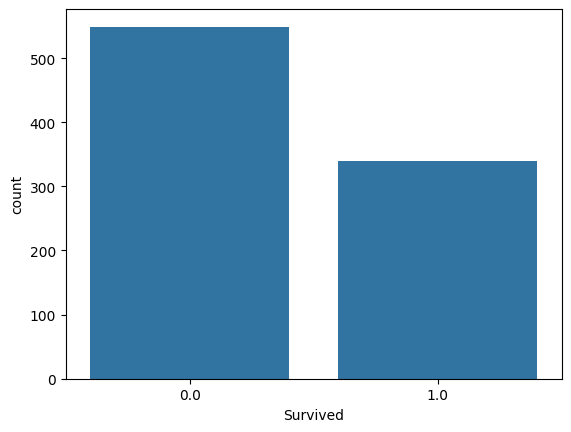

In [ ]:
new_df1 = new_df1.reset_index(drop=True)
sns.countplot(x="Survived", data=new_df1)
plt.show()

Male v/s Female

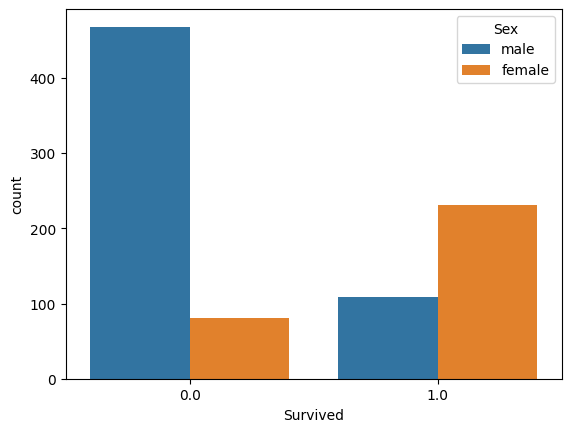

In [ ]:
 sns.countplot(x="Survived",hue="Sex",data=new_df1)
plt.show()

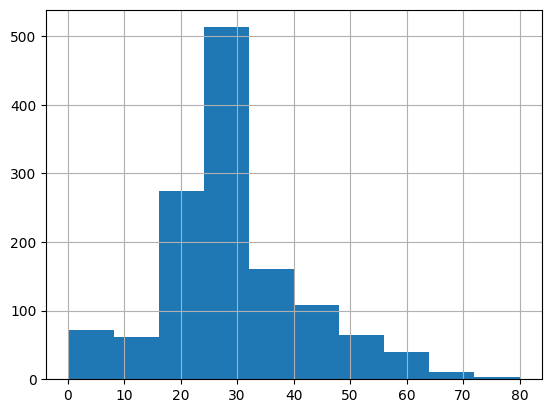

In [ ]:
new_df1["Age"].hist()
plt.show()

In [ ]:
gender=pd.get_dummies(new_df1['Sex'],drop_first=True,dtype=int)
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
1302,1
1303,0
1304,1
1305,1


In [ ]:
new_df1['Gender']=gender

In [ ]:
df1.ndim

2

In [ ]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
new_df1[["Age"]] = SS.fit_transform(new_df1[["Age"]])
new_df1[["SibSp"]] = SS.fit_transform(new_df1[["SibSp"]])
new_df1[["Parch"]] = SS.fit_transform(new_df1[["Parch"]])
new_df1[["Fare"]] = SS.fit_transform(new_df1[["Fare"]])

In [ ]:
new_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,code,Gender
0,1,0.0,3,"Braund, Mr. Owen Harris",male,-0.580261,0.480272,-0.445407,A/5 21171,-0.501839,S,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.662297,0.480272,-0.445407,PC 17599,0.736023,C,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,-0.269621,-0.479537,-0.445407,STON/O2. 3101282,-0.488790,S,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.429318,0.480272,-0.445407,113803,0.384512,S,1,0
4,5,0.0,3,"Allen, Mr. William Henry",male,0.429318,-0.479537,-0.445407,373450,-0.486373,S,1,1


In [ ]:
new_df1.drop(new_df1.columns[[3,4,8,10]],axis=1,inplace=True)

In [ ]:
df_new_train = new_df1[new_df1["code"]==1]
df_new_test = new_df1[new_df1["code"]==0]

In [ ]:
df_new_train.shape

(889, 9)

In [ ]:
df_new_test.shape

(418, 9)

In [ ]:
a_train = df_new_train[["Pclass","Age","SibSp","Parch","Fare",'Gender']]
b_train = df_new_train["Survived"]

In [ ]:
x_test = df_new_test[["Pclass","Age","SibSp","Parch","Fare",'Gender']]
y_test = df_new_test["Survived"]

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(a_train,b_train)

LogisticRegression()

In [ ]:
LR.coef_

array([[-1.04838205, -0.49398589, -0.34842614, -0.0814635 ,  0.15210528,
        -2.64241034]])

In [ ]:
b_pred_train = LR.predict(a_train)
b_pred_train

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
y_pred_test = LR.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ac1 = accuracy_score(b_train,b_pred_train)
print("accuracy:" ,ac1.round(2) )

accuracy: 0.8


In [ ]:
y_pred_test

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(b_train,b_pred_train)
prec = precision_score(b_train, b_pred_train)
rec = recall_score(b_train, b_pred_train)
f1 = f1_score(b_train, b_pred_train)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.795276,0.743827,0.708824,0.725904


In [ ]:
df_new_train["b_proba"] = LR.predict_proba(a_train)[:,1]
df_new_train.head()


<ipython-input-50-331dc636cd4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_train["b_proba"] = LR.predict_proba(a_train)[:,1]


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code,Gender,b_proba
0,1,0.0,3,-0.580261,0.480272,-0.445407,-0.501839,1,1,0.098968
1,2,1.0,1,0.662297,0.480272,-0.445407,0.736023,1,0,0.891380
2,3,1.0,3,-0.269621,-0.479537,-0.445407,-0.488790,1,0,0.649451
3,4,1.0,1,0.429318,0.480272,-0.445407,0.384512,1,0,0.897204
4,5,0.0,3,0.429318,-0.479537,-0.445407,-0.486373,1,1,0.085436


In [ ]:
fpr,tpr,dummy = roc_curve(b_train,df_new_train["b_proba"])

import matplotlib.pyplot as plt
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr,color='yellow')
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.show()

print("AUC score:", roc_auc_score(b_train,df_new_train["b_proba"]).round(3))

Interview Questions:

1. What is the difference between precision and recall?

    precision : it is the ratio of correctly predicted +ve observation to the total predicted +ve observations.

    recall: it is the ratio of correctly predicted +ve observations to all actual +ves.
   

2. What is cross-validation, and why is it important in binary classification?

    Cross-validation is a technique for evaluating machine learning models by training them on different subsets of the available data and testing on the remaining data.

    it gives : robustness ; hyperparameter-tuning ; model selection.